# Read the data set

In [1763]:
import pandas as pd # type: ignore
df = pd.read_csv('IRIS.csv')

In [1764]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data set information

In [1765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [1766]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [1767]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Checking for nulls

In [1768]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Replace Missing Values or Nulls

In [1769]:
import warnings
warnings.simplefilter("ignore")
median_sepal_length  = df['sepal_length'].median()
df['sepal_length'].fillna(median_sepal_length,inplace = True)
median_sepal_width  = df['sepal_width'].median()
df['sepal_width'].fillna(median_sepal_width,inplace = True)
median_petal_width  = df['petal_width'].median()
df['petal_width'].fillna(median_petal_width,inplace = True)
median_petal_length  = df['petal_length'].median()
df['petal_length'].fillna(median_petal_length,inplace = True)
 

# Drop Duplicates

In [ ]:
df.drop_duplicates()
df.dropna()

In [1772]:
import pandas as pd # type: ignore

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

remove_outliers(df,['sepal_length','sepal_width','petal_length','petal_width'])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


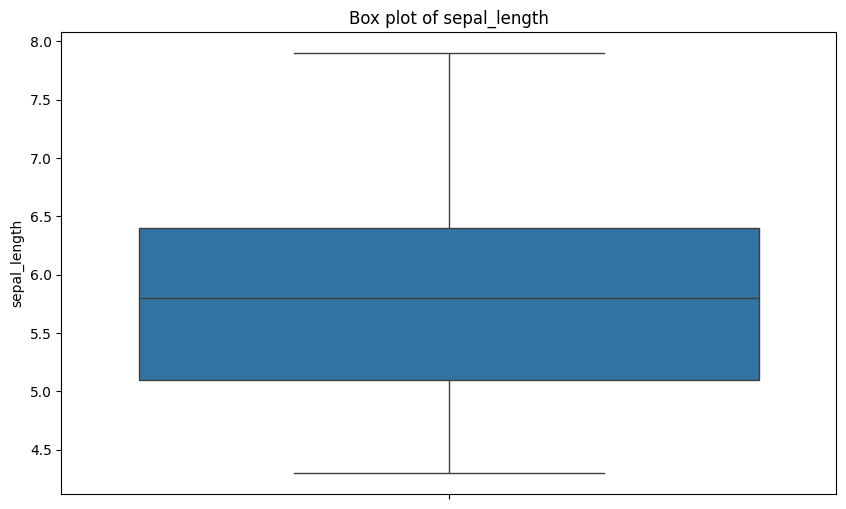

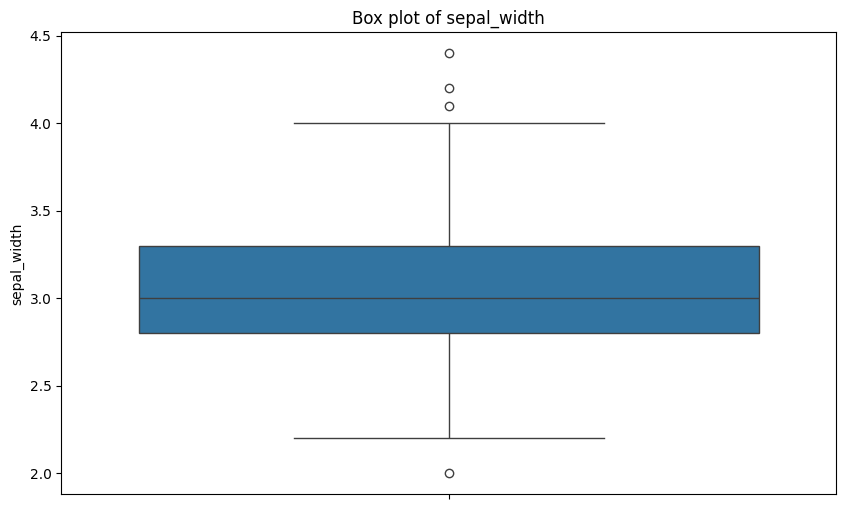

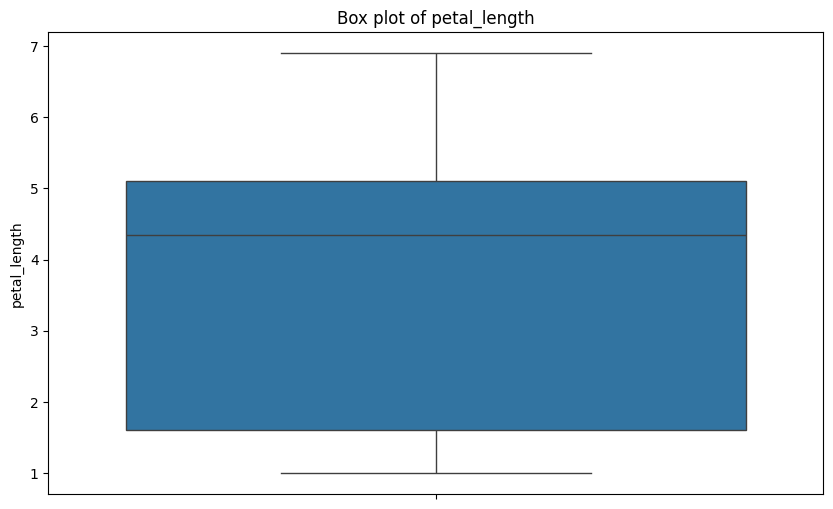

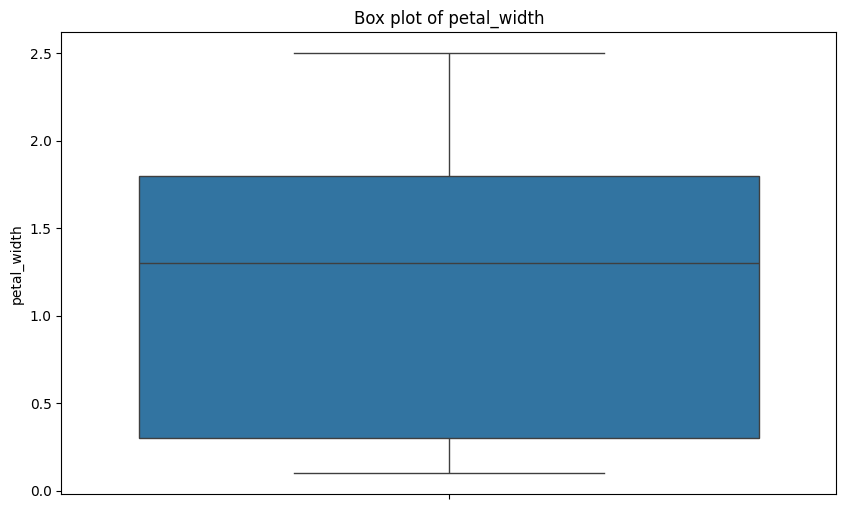

In [1773]:
import seaborn as sns  # type: ignore
import matplotlib.pyplot as plt # type: ignore
def vis_quartiles(columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=df[col])
        plt.title(f'Box plot of {col}')
        plt.show()
    
vis_quartiles(['sepal_length','sepal_width','petal_length','petal_width'])

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

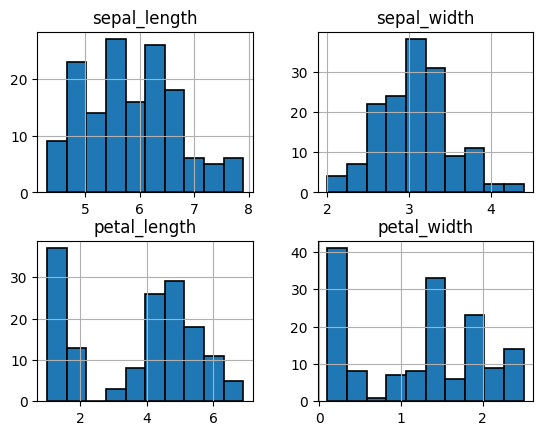

In [1774]:
df.hist(edgecolor='black', linewidth=1.2)


## Encoding Categorical Variables

In [1775]:
from sklearn.preprocessing import LabelEncoder # type: ignore
df['species'] = df['species'].astype(str)

# # Apply LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
 

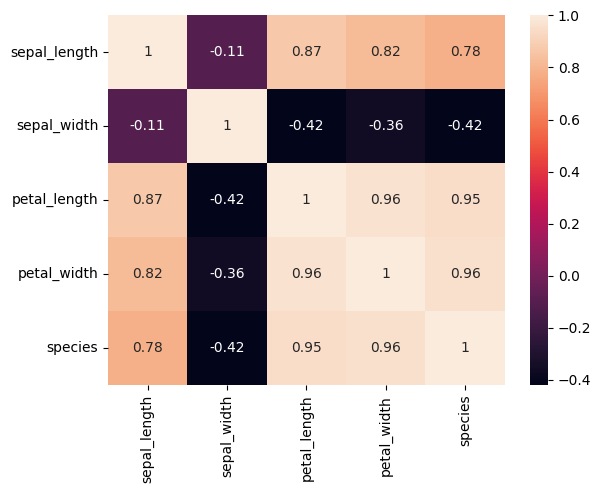

In [1776]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()
           

# Splitting the data set into traint and test data

In [1777]:
# split X and y into training and
from sklearn.model_selection import train_test_split # type: ignore


X = df.drop(['species'], axis=1)
y = df['species'] # Target Column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train

,sepal_length,sepal_width,petal_length,petal_width
13,4.3,3.0,1.1,0.1
15,5.7,4.4,1.5,0.4
61,5.9,3.0,4.2,1.5
91,6.1,3.0,4.6,1.4
116,6.5,3.0,5.5,1.8
...,...,...,...,...
50,7.0,3.2,4.7,1.4
87,6.3,2.3,4.4,1.3
104,6.5,3.0,5.8,2.2
129,7.2,3.0,5.8,1.6


# Feature Scaling

In [1778]:
#z=(x-u)/s
from sklearn.preprocessing import StandardScaler # type: ignore
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

# Logistic Regression

In [1779]:
from sklearn.linear_model import LogisticRegression # type: ignore

log_Reg = LogisticRegression(random_state = 0).fit(X_train,y_train)

log_Reg.predict(X_train)

array([0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1,
       1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2,
       1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2])

In [1780]:
#accuracy of predicting the train data
log_Reg.score(X_train,y_train)

0.9809523809523809

In [1781]:
#accuracy of predicting the test data
log_Reg_Accuracy = log_Reg.score(X_test,y_test)
log_Reg_Accuracy

0.8666666666666667

## Ridge Regulization

In [1782]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_log_acc = ridgeReg.score(X_train, y_train)
log_acc = ridgeReg.score(X_test, y_test)
y_pred = log_Reg.predict(X_test)

In [1783]:
train_log_acc

0.9142352593670608

In [1784]:
log_acc

0.8625716728815801

#### Classification report

In [1785]:
y_pred = log_Reg.predict(X_test)

# Calculate accuracy on test data
test_accuracy = log_Reg.score(X_test, y_test)
print('Test set accuracy: {:.4f}'.format(test_accuracy))

# Generate classification report for test data
report = classification_report(y_test, y_pred) # type: ignore
print("\nClassification Report:")
print(report)

Test set accuracy: 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.83      0.50      0.62        10
           2       0.74      1.00      0.85        14

    accuracy                           0.87        45
   macro avg       0.86      0.82      0.82        45
weighted avg       0.88      0.87      0.86        45



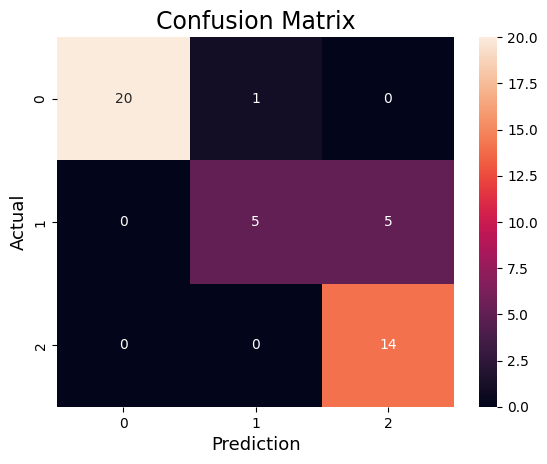

In [1786]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



# KNN

In [1787]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier # type: ignore

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)
# fit the model to the training set
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [1788]:
y_pred = knn.predict(X_test)

y_pred

array([2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2])

In [1789]:
from sklearn.metrics import accuracy_score # type: ignore

KNN_Accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8889


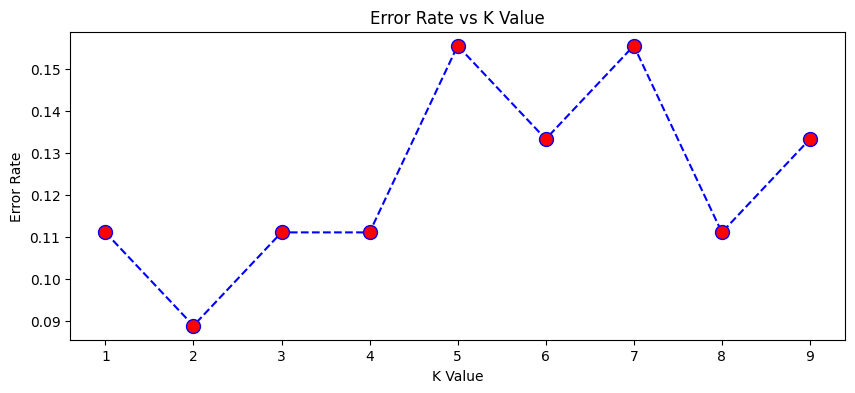

In [1790]:
import matplotlib.pyplot as plt  # type: ignore # Ensure the correct import
import numpy as np # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# To find the best k
error_rate = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))

# Plotting the error rate vs K value
plt.figure(figsize=(10, 4))  # This should now correctly create a figure
plt.plot(range(1, 10), error_rate, color="blue", ls="--", marker="o", markersize=10, markerfacecolor="red")
plt.title("Error Rate vs K Value")
plt.ylabel("Error Rate")
plt.xlabel("K Value")
plt.show()



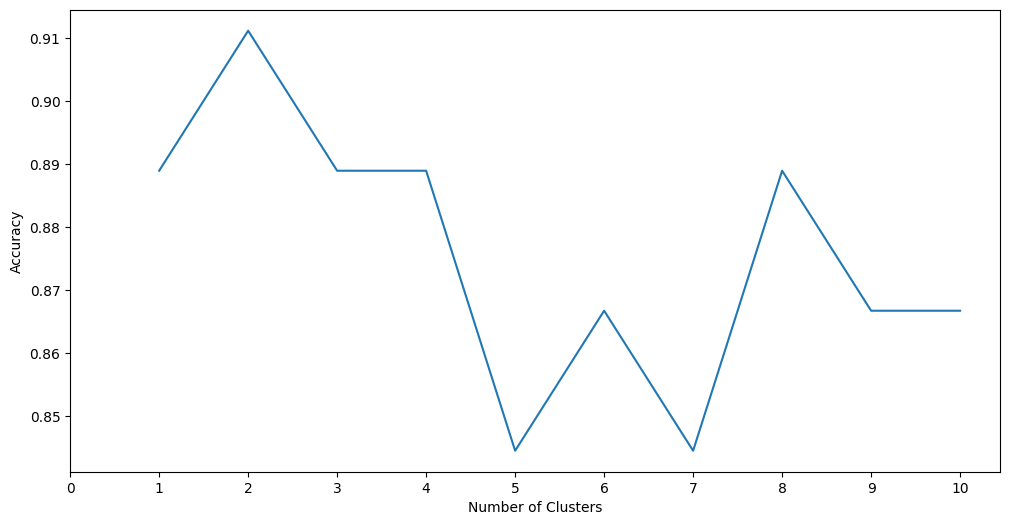

Accuracies for different values of n are: [0.88888889 0.91111111 0.88888889 0.88888889 0.84444444 0.86666667
 0.84444444 0.88888889 0.86666667 0.86666667] with the max value as  0.9111111111111111


In [1791]:
from sklearn import metrics  # type: ignore # Import metrics for accuracy_score
from sklearn.model_selection import train_test_split  # type: ignore # Ensure you have this if you split your data
a_index = list(range(1, 11))
a = []
x = list(range(11))
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    a.append(metrics.accuracy_score(prediction, y_test))

a = pd.Series(a)
plt.plot(a_index, a)
plt.xticks(x)
plt.xlabel('Number of Clusters')  # Set x-axis label
plt.ylabel('Accuracy')  # Set y-axis label
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.max())


#### classification report

In [1792]:
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
y_pred = knn.predict(X_test)
 
# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.83      0.50      0.62        10
           2       0.74      1.00      0.85        14

    accuracy                           0.87        45
   macro avg       0.86      0.82      0.82        45
weighted avg       0.88      0.87      0.86        45



# Naive Bayes

## Model training


In [1793]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

## Predict the results


In [1794]:
y_pred = gnb.predict(X_test)
y_pred

array([2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2,
       1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 2, 0,
       2])

## Check accuracy score


In [1795]:
Naive_Bayes_Accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.8222


#### Classification Report

In [1796]:
y_pred = gnb.predict(X_test)

# Calculate the accuracy score
Naive_Bayes_Accuracy = accuracy_score(y_test, y_pred)
print('Naive Bayes Model accuracy score: {0:0.4f}'.format(Naive_Bayes_Accuracy))

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Naive Bayes Model accuracy score: 0.8222

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.60      0.60      0.60        10
           2       0.78      1.00      0.88        14

    accuracy                           0.82        45
   macro avg       0.79      0.80      0.79        45
weighted avg       0.84      0.82      0.82        45



# SVM

In [1797]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)

# Predicting the result and giving the accuracy
SVM_Accuracy = classifier.score(X_test, y_test)

print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.9905
Test set score: 0.8667


#### classification report

In [1798]:
y_pred = classifier.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.83      0.50      0.62        10
           2       0.74      1.00      0.85        14

    accuracy                           0.87        45
   macro avg       0.86      0.82      0.82        45
weighted avg       0.88      0.87      0.86        45



## Feature Selection

In [1799]:
from sklearn.feature_selection import SelectFromModel

# Example of feature selection with SVM
selector = SelectFromModel(SVC(kernel='linear', C=1.0))
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Fit SVM on selected features
classifier.fit(X_train_selected, y_train)

# Evaluate the model
training_accuracy_selected = classifier.score(X_train_selected, y_train)
SVM_test_accuracy_selected = classifier.score(X_test_selected, y_test)

print('Training set score (after feature selection): {:.4f}'.format(training_accuracy_selected))
print('Test set score (after feature selection): {:.4f}'.format(test_accuracy_selected)) # type: ignore


Training set score (after feature selection): 0.9619
Test set score (after feature selection): 0.8889


# Decision Tree

In [1800]:
from sklearn import tree

# Initialize the Decision Tree Classifier with regularization parameters
model = tree.DecisionTreeClassifier(
    max_depth=10,           # Limit the maximum depth of the tree
    min_samples_split=10,   # The minimum number of samples required to split an internal node
    min_samples_leaf=5,     # The minimum number of samples required to be at a leaf node
    max_leaf_nodes=50,      # Limit the number of leaf nodes
    max_features='sqrt'     # Consider a random subset of features at each split
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the training set score
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

# Print the test set score
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

DT_Accuracy = model.score(X_test, y_test)
# Make predictions on the test data
predictions = model.predict(X_test)




Training set score: 0.9143
Test set score: 0.8667


#### Classification report

In [1801]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.70      0.70      0.70        10
           2       0.82      1.00      0.90        14

    accuracy                           0.87        45
   macro avg       0.84      0.85      0.84        45
weighted avg       0.88      0.87      0.87        45



# Showing the accuracy 

In [1802]:
import plotly.graph_objects as go
fig = go.Figure()

Algorithms = ['Naive Bayes', 'SVM', 'KNN', 'Logistic Regression',"Decision Tree"]
Accuracy = [Naive_Bayes_Accuracy, SVM_test_accuracy_selected, KNN_Accuracy, log_acc,DT_Accuracy]

# Add bar trace
fig.add_trace(go.Bar(x=Algorithms, y=Accuracy, name='Accuracy'))



fig.show()

In [1803]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


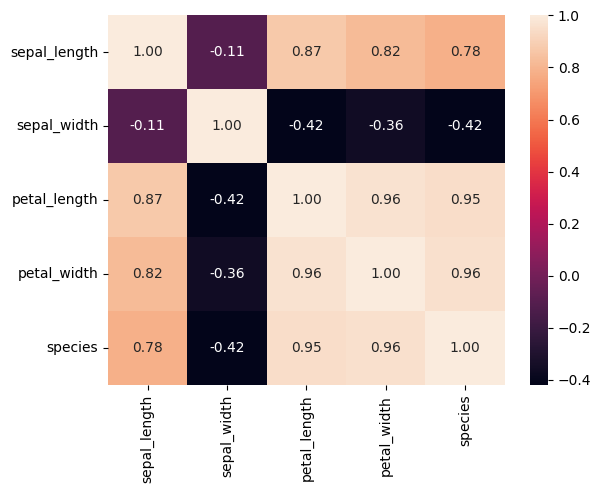

In [1804]:
import seaborn as sns # type: ignore
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()
